2 state quantum computing

In [2]:
pip install pulser

     |████████████████████████████████| 113 kB 7.4 MB/s 
     |████████████████████████████████| 15.7 MB 69.3 MB/s 
     |████████████████████████████████| 14.6 MB 42.9 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import qutip
from itertools import product
from pulser import Pulse, Sequence, Register
from pulser.devices import Chadoq2
from pulser.simulation import Simulation
from pulser.waveforms import BlackmanWaveform,ConstantWaveform


Automatic qubit register creation,inline with even spacing

In [4]:
def BuildRegister(size,spacing):
    reg_dict = {}
    for i in range(size):
        reg_dict[str(i)] = np.array([0+i*spacing,0.])
    reg = Register(reg_dict)
    seq = Sequence(reg, Chadoq2)
    return reg,seq

In [5]:
def X(target):
    pulse = Pulse.ConstantDetuning(BlackmanWaveform(300, np.pi), 0.,np.pi/2)
    if 'raman' not in seq.declared_channels:
        seq.declare_channel('raman','raman_local', str(target))
    seq.target(str(target),'raman')
    seq.add(pulse,'raman')

def Y(target):
  pulse = Pulse.ConstantDetuning(BlackmanWaveform(300, np.pi), 0.,np.pi)
  if 'raman' not in seq.declared_channels:
    seq.declare_channel('raman', 'raman_local', str(target))
  seq.target(str(target), 'raman')
  seq.add(pulse, 'raman')

def Z(target):
  pulse = Pulse.ConstantDetuning(BlackmanWaveform(300, 2*np.pi), 0.,np.pi/2)
  if 'raman' not in seq.declared_channels:
    seq.declare_channel('raman','raman_local', str(target))
  seq.target(str(target),'raman')
  seq.add(pulse,'raman')


def H(target):
    pulse = Pulse.ConstantDetuning(BlackmanWaveform(300, np.pi/2), 0.,np.pi/2, post_phase_shift=np.pi)
    if 'raman' not in seq.declared_channels:
        seq.declare_channel('raman','raman_local', str(target))
    seq.target(str(target),'raman')
    seq.add(pulse, 'raman', 'wait-for-all')

In [6]:
def Plot_States(qubits):
    simul = Simulation(seq)
    res = simul.run()
    if qubits ==1:
        data1=[st.overlap(qutip.ket('0')) for st in res.states]
        data2=[st.overlap(qutip.ket('1')) for st in res.states]

        
        print(res.states[-1])

        fig,axs = plt.subplots(2)

        axs[0].plot(np.real(data1))
        axs[0].plot(np.imag(data1))
        axs[0].legend(['real','imaginary'])
        axs[0].set(xlabel = r"Time [ns]", ylabel=fr'$ \langle\,0|\, \psi(t)\rangle$')
        
        axs[1].plot(np.real(data2))
        axs[1].plot(np.imag(data2))
        axs[1].legend(['real','imaginary'])
        axs[1].set( xlabel = r"Time [ns]", ylabel=fr'$ \langle\,1 |\, \psi(t)\rangle$')

    
    elif qubits == 2:
        data1=[st.overlap(qutip.ket('01')) for st in res.states]
        data2=[st.overlap(qutip.ket('10')) for st in res.states]
        data3=[st.overlap(qutip.ket('01')) for st in res.states]
        data4=[st.overlap(qutip.ket('11')) for st in res.states]

        print(res.states[-1])

        fig,axs = plt.subplots(4,figsize=(15,15))

        axs[0].plot(np.real(data1))
        axs[0].plot(np.imag(data1))
        axs[0].legend(['real','imaginary'])
        axs[0].set(xlabel = r"Time [ns]", ylabel=fr'$ \langle\,00|\, \psi(t)\rangle$')
        
        axs[1].plot(np.real(data2))
        axs[1].plot(np.imag(data2))
        axs[1].legend(['real','imaginary'])
        axs[1].set( xlabel = r"Time [ns]", ylabel=fr'$ \langle\,10 |\, \psi(t)\rangle$')
        
        axs[2].plot(np.real(data3))
        axs[2].plot(np.imag(data3))
        axs[2].legend(['real','imaginary'])
        axs[2].set( xlabel = r"Time [ns]", ylabel=fr'$ \langle\,01 |\, \psi(t)\rangle$')
   
        axs[3].plot(np.real(data4))
        axs[3].plot(np.imag(data4))
        axs[3].legend(['real','imaginary'])
        axs[3].set( xlabel = r"Time [ns]", ylabel=fr'$ \langle\,11 |\, \psi(t)\rangle$')
    else:
        print("you wot mate!?")
   
   

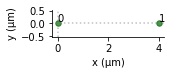

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 9.97496196e-11+4.65568296e-37j]
 [-9.98392849e-06-6.11339303e-22j]
 [-9.99078342e-06-6.11759047e-22j]
 [ 1.00000000e+00+1.22464680e-16j]]


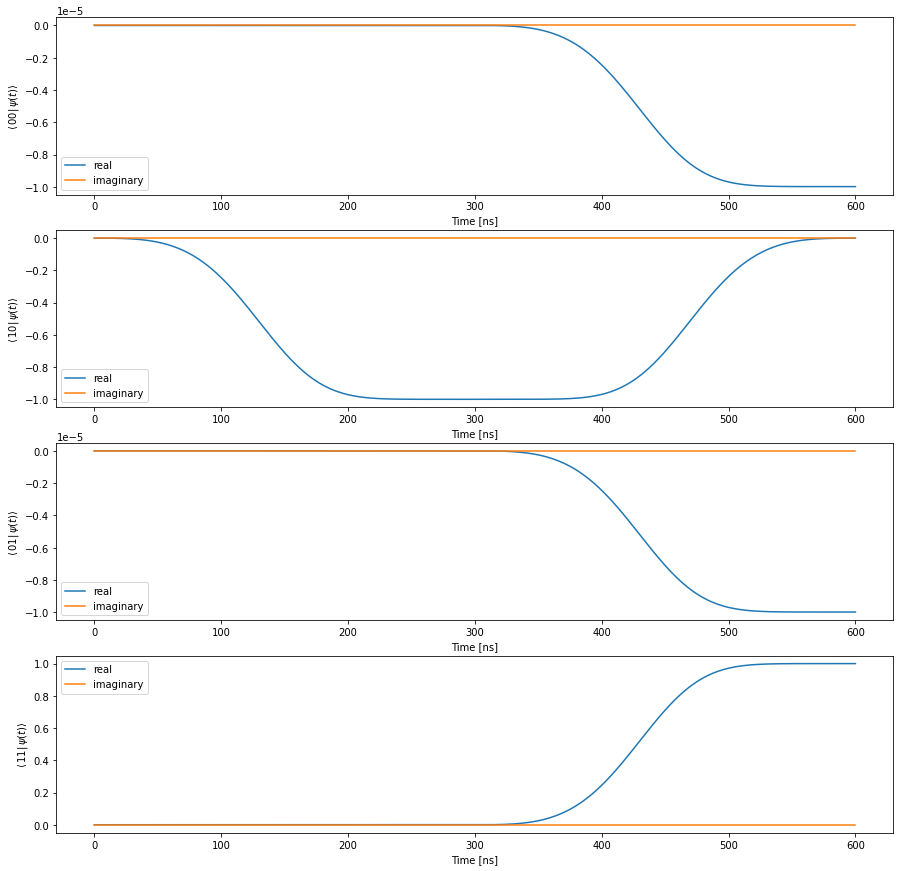

In [7]:
qubits = 2;
spacing = 4

reg, seq = BuildRegister(qubits,spacing)
reg.draw()

X(0)
X(1)





Plot_States(qubits)




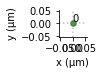

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-2.39569322e-05-1.45548286e-31j]
 [ 1.00000000e+00+6.12323399e-17j]]


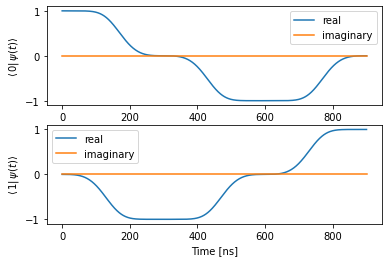

In [8]:
qubits = 1;
spacing = 4

reg, seq = BuildRegister(qubits,spacing)
reg.draw()

X(0)
X(0)
X(0)

Plot_States(qubits)

# the hadamard gate works perfectly
# the X gate works perfectly

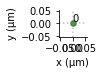

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 3.43419196e-05+6.77464601e-32j]
 [-9.99999999e-01-6.12323399e-17j]]


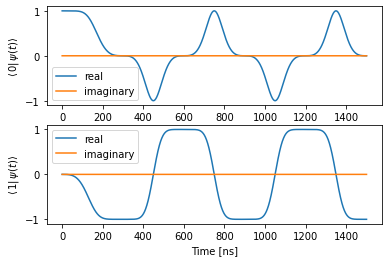

In [9]:
qubits = 1;
spacing = 4

reg, seq = BuildRegister(qubits,spacing)
reg.draw()

X(0)
Z(0)
Z(0)
Z(0)
Z(0)

Plot_States(qubits)
# z gate works perfectly

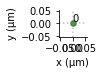

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 6.43412339e-07+0.70707985j]
 [-6.43363331e-07-0.70713372j]]


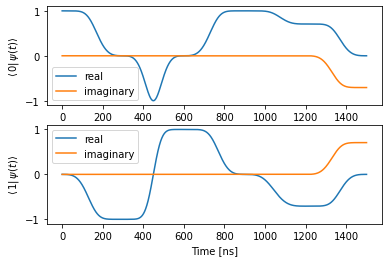

In [11]:
qubits = 1;
spacing = 4

reg, seq = BuildRegister(qubits,spacing)
reg.draw()

X(0)
Z(0)
X(0)
H(0)
Y(0)

Plot_States(qubits)

# Y gate also works perfectly